<a href="https://colab.research.google.com/github/jadsoncastro/IA-codigos-disciplina/blob/main/Aprendizado-de-Maquina/Aula_28092022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas


In [ ]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Leitura do conjunto de dados

In [ ]:
df = pd.read_csv("disciplina.csv", delimiter=";")

In [ ]:
df.head()

,id,Nota1,Nota2,Resultado
0,1,7.0,10.0,Aprovado
1,2,10.0,10.0,Aprovado
2,3,1.0,10.0,Reprovado
3,4,2.0,3.0,Reprovado
4,5,10.0,8.0,Aprovado


In [ ]:
df.drop("id", axis=1, inplace=True)


In [ ]:
df["Resultado"] = df["Resultado"].astype(str)

#Descrições estatísticas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nota1      59 non-null     float64
 1   Nota2      59 non-null     float64
 2   Resultado  59 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


#Visualização dos dados

In [ ]:
import seaborn as sns

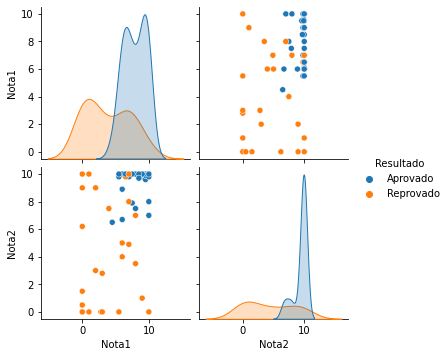

In [ ]:
sns.pairplot(df, hue="Resultado")

#Divisão do conjunto de treinamento e teste

In [ ]:
X = df.values[:,:-1]
y = df.values[:,-1]

xTrain,xTest, yTrain, yTest = train_test_split(X,y, test_size=0.1)


#Execução dos modelos

In [ ]:
#Regressao Logística
modeloLR = LogisticRegression()
modeloLR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
#Arvore de decisao
modeloDT = DecisionTreeClassifier()
modeloDT.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
#Random Forest (Arvores aleatorias)
modeloRF= RandomForestClassifier()
modeloRF.fit(xTrain, yTrain)

RandomForestClassifier()

#Predição no conjunto de teste

In [ ]:
predicaoRL = modeloLR.predict(xTest)
predicaoDT = modeloDT.predict(xTest)
predicaoRF = modeloRF.predict(xTest)

In [ ]:
# Tabelar os resultados finais
tmp = np.vstack((predicaoRL, predicaoDT, predicaoRF, yTest)).T

In [ ]:
pd.DataFrame(tmp, columns=["RegLogistica", "Arvore Decisao", "Random Forest", "Valor Real"])

,RegLogistica,Arvore Decisao,Random Forest,Valor Real
0,Aprovado,Aprovado,Aprovado,Aprovado
1,Aprovado,Aprovado,Aprovado,Aprovado
2,Reprovado,Aprovado,Reprovado,Reprovado
3,Reprovado,Reprovado,Reprovado,Reprovado
4,Reprovado,Aprovado,Aprovado,Aprovado
5,Reprovado,Reprovado,Reprovado,Reprovado
